In [1]:
import numpy as np
import pandas as pd
import mine_tools as mt

# Objetivos:
- Enseñar aplicaciones de mine_tools.py

In [2]:
mina_df = pd.read_csv('CP_fases.txt', sep="\s+")
mina_df.rename(columns={'0': 'id'}, inplace=True)

combinaciones = (
    mina_df[['fase', 'z']]
    .drop_duplicates()
    .sort_values(['fase', 'z'], ascending=[True, False])
)

# Asignar número de banco por grupo de fase
combinaciones['banco'] = (
    combinaciones.groupby('fase').cumcount() + 1
)

# Unir esta info de vuelta al df original
mina_df = mina_df.merge(combinaciones, on=['fase', 'z'], how='left')

mina_df.head()

,x,y,z,au,cpy,cueq,cus,cut,density,material,py,recg_au,recg_cu,tasox,tipomineral,fase,id,banco
0,491425.0,7456205.0,1968.0,0.288929,1.124707,0.712658,0.022003,0.550661,2.615598,8,0.401511,69.001505,87.011938,0.039957,2,4,1,22
1,491435.0,7456195.0,1968.0,0.266522,1.057851,0.640223,0.021141,0.491924,2.626056,8,0.197908,68.839492,87.471598,0.042976,2,4,2,22
2,491445.0,7456195.0,1968.0,0.243283,2.427782,0.531022,0.019991,0.396348,2.637350,6,0.399009,68.633711,87.659524,0.050438,2,4,3,22
3,491455.0,7456195.0,1968.0,0.243283,2.427782,0.531022,0.019991,0.396348,2.637350,6,0.399009,68.633711,87.659524,0.050438,2,4,4,22
4,491435.0,7456205.0,1968.0,0.288929,1.124707,0.712658,0.022003,0.550661,2.615598,8,0.401511,69.001505,87.011938,0.039957,2,4,5,22


In [3]:
R = 0.9
P = 4
cm = 2
cp = 10
cr = 0.25
alpha_ley_corte = 0
FTL = 2204.62
ley_marginal = cp/((P-cr)*FTL*R)
ley_critica = (cp+cm)/((P-cr)*FTL*R)

ley_corte = ((1-alpha_ley_corte)*ley_marginal + alpha_ley_corte*(ley_critica))*100
mina_df['destino'] = [1 if mina_df.iloc[i]['cut']>= ley_corte else 0 for i in range(len(mina_df))]

In [4]:
ley_corte

0.13439789909204142

# Fitting de conos y rampas
Haremos fitting por volumen para el cono y para la rampa, simularemos algunos casos simples.

In [3]:
mina_fase_1 = mina_df[mina_df['fase'] == 1].copy()

In [4]:
cono_vol = mt.Best_Cone_by_Volume(mina_fase_1, max_global_angle=45)

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 46601774.181524806
       x: [ 3.968e+02  3.735e+02  3.003e+02  8.078e-01  4.914e+05
            7.456e+06  2.304e+03]
     nit: 10
     jac: [ 1.174e+05  1.248e+05  1.552e+05  0.000e+00 -5.000e-01
            0.000e+00        nan]
    nfev: 45
    njev: 6


# Clusterización

Probaremos unos cuantos casos:
Comparacion Shape Refinement
En lo siguiente, se usan hyps por defecto sino se menciona:
Comparacion penalizacion c: nula, suave, brutal. 
Comparacion penalizacion direccion de mineria: nula, suave, brutal. 

In [5]:
params1 = {'path_params':'/home/ignacio/Laboratorio-2/Params/', 'penalizacion_c':0.5, 'Shape_Refinement':'Modificado', 'penalizacion_destino':0.9}
params2 = {'path_params':'/home/ignacio/Laboratorio-2/Params/', 'penalizacion_c':0.5, 'Shape_Refinement':None,  'penalizacion_destino':0.9}

In [6]:
params3 = {'path_params':'/home/ignacio/Laboratorio-2/Params/', 'penalizacion_c':0, 'Shape_Refinement':'Modificado', 'penalizacion_destino':0.9}
params4 = {'path_params':'/home/ignacio/Laboratorio-2/Params/', 'penalizacion_c':0.01, 'Shape_Refinement':'Modificado',  'penalizacion_destino':0.9}

In [7]:
params5 = {'path_params':'/home/ignacio/Laboratorio-2/Params/', 'penalizacion_c':0.5, 'Shape_Refinement':'Modificado', 'penalizacion_destino':0.9, 'peso_direccion_mineria': 0}
params6 = {'path_params':'/home/ignacio/Laboratorio-2/Params/', 'penalizacion_c':0.5, 'Shape_Refinement':'Modificado',  'penalizacion_destino':0.9, 'peso_direccion_mineria': 0.01}

In [5]:
mina_clusterizada1 = mt.Clustering_parallel(mina_df, options=params1)

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------





Fase-Banco N° 1-14
Fase-Banco N° 2-18
Tamaño de la fase-banco: 181
Tamaño de la fase-banco: 260


Fase-Banco N° 3-23
Tamaño de la fase-banco: 198
MaxCL: 18, AveCL: 13, MinCL: 5


Fase-Banco N° 4-23
Tamaño de la fase-banco: 393
MaxCL: 19, AveCL: 14, MinCL: 5
MaxCL: 26, AveCL: 19, MinCL: 5
MaxCL: 39, AveCL: 29, MinCL: 5
========PreProcessing Results========
Tamaño Fase-Banco: 181
Clusters objetivo: 13
Clusters eliminados: 168
Total de clusters: 14
Tiempo: 2.58972430229187
========PreProcessing Results========
Tamaño Fase-Banco: 198
Clusters objetivo: 14
Clusters eliminados: 184
Total de clusters: 14
Tiempo: 2.959519863128662
========PostProcessing Results========
Total de clusters: 14
Tiempo: 0.8147060871124268
========PostProcessing Results========
Total 

In [17]:
mina_clusterizada1.to_csv("Clusterizacion1.csv", index=False)

Importante: Recordar cambiar nombre carpeta Clusterizacion-> Clusterizacion2

In [14]:
mina_clusterizada2 = mt.Clustering_parallel(mina_df, options=params2)

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------



Fase-Banco N° 1-14
Tamaño de la fase-banco: 181
MaxCL: 18, AveCL: 13, MinCL: 5


Fase-Banco N° 2-18
Tamaño de la fase-banco: 260
MaxCL: 26, AveCL: 19, MinCL: 5


Fase-Banco N° 3-23
Tamaño de la fase-banco: 198
MaxCL: 19, AveCL: 14, MinCL: 5


Fase-Banco N° 4-23
Tamaño de la fase-banco: 393
MaxCL: 39, AveCL: 29, MinCL: 5
========PreProcessing Results========
Tamaño Fase-Banco: 181
Clusters objetivo: 13
Clusters eliminados: 168
Total de clusters: 14
Tiempo: 2.7499637603759766
========PreProcessing Results========
Tamaño Fase-Banco: 198
Clusters objetivo: 14
Clusters eliminados: 184
Total de clusters: 14
Tiempo: 3.018155574798584


Fase-Banco N° 1-13
Tamaño de la fase-banco: 346
MaxCL: 34, AveCL: 25, MinCL: 5
---Precedencias Detectadas
[(1, 14)]


Fase-Banco 

In [18]:
mina_clusterizada2.to_csv("Clusterizacion2.csv", index=False)

In [8]:
mina_clusterizada3 = mt.Clustering_parallel(mina_df, options=params3)
mina_clusterizada3.to_csv("Clusterizacion3.csv", index=False)

---------Ley de corte usada: 0.1423036578621615---------



Fase-Banco N° 1-14
Tamaño de la fase-banco: 181
---------Ley de corte usada: 0.1423036578621615---------

MaxCL: 18, AveCL: 13, MinCL: 5


Fase-Banco N° 2-18
Tamaño de la fase-banco: 260
---------Ley de corte usada: 0.1423036578621615---------



MaxCL: 26, AveCL: 19, MinCL: 5
Fase-Banco N° 3-23
---------Ley de corte usada: 0.1423036578621615---------

Tamaño de la fase-banco: 198


Fase-Banco N° 4-23
MaxCL: 19, AveCL: 14, MinCL: 5Tamaño de la fase-banco: 393

MaxCL: 39, AveCL: 29, MinCL: 5
========PreProcessing Results========
Tamaño Fase-Banco: 181
Clusters objetivo: 13
Clusters eliminados: 168
Total de clusters: 14
Tiempo: 2.5003268718719482
========PreProcessing Results========
Tamaño Fase-Banco: 198
Clusters objetivo: 14
Clusters eliminados: 184
Total de clusters: 14
Tiempo: 2.812208890914917
========PostProcessing Results========
Total de clusters: 14
Tiempo: 0.6750273704528809
========PostProcessing Results========
Tota

In [ ]:
mina_clusterizada4 = mt.Clustering_parallel(mina_df, options=params4)
mina_clusterizada4.to_csv("Clusterizacion3.csv", index=False)

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------

---------Ley de corte usada: 0.1423036578621615---------








Fase-Banco N° 1-14Fase-Banco N° 3-23
Fase-Banco N° 2-18

Fase-Banco N° 4-23

Tamaño de la fase-banco: 181Tamaño de la fase-banco: 260Tamaño de la fase-banco: 198

Tamaño de la fase-banco: 393

MaxCL: 18, AveCL: 13, MinCL: 5
MaxCL: 19, AveCL: 14, MinCL: 5
MaxCL: 26, AveCL: 19, MinCL: 5
MaxCL: 39, AveCL: 29, MinCL: 5
========PreProcessing Results========
Tamaño Fase-Banco: 181
Clusters objetivo: 13
Clusters eliminados: 168
Total de clusters: 14
Tiempo: 2.4329209327697754
========PreProcessing Results========
Tamaño Fase-Banco: 198
Clusters objetivo: 14
Clusters eliminados: 184
Total de clusters: 14
Tiempo: 2.8281683921813965
========PostProcessing Results========
Total de clusters: 14
Tiempo: 0.7208631038665771
========PostProcessing Results========
Tot

Tratando 'cluster' como Categórica (14 valores únicos).
Tratando 'cluster' como Categórica (14 valores únicos).
Tratando 'cluster' como Categórica (13 valores únicos).
Tratando 'cluster' como Categórica (14 valores únicos).
Tratando 'cluster' como Categórica (15 valores únicos).
Tratando 'cluster' como Categórica (14 valores únicos).
Tratando 'cluster' como Categórica (14 valores únicos).
Tratando 'cluster' como Categórica (15 valores únicos).
Tratando 'cluster' como Categórica (14 valores únicos).
Tratando 'cluster' como Categórica (14 valores únicos).
Tratando 'cluster' como Categórica (13 valores únicos).
Tratando 'cluster' como Categórica (14 valores únicos).
Tratando 'cluster' como Categórica (20 valores únicos).
Tratando 'cluster' como Categórica (17 valores únicos).


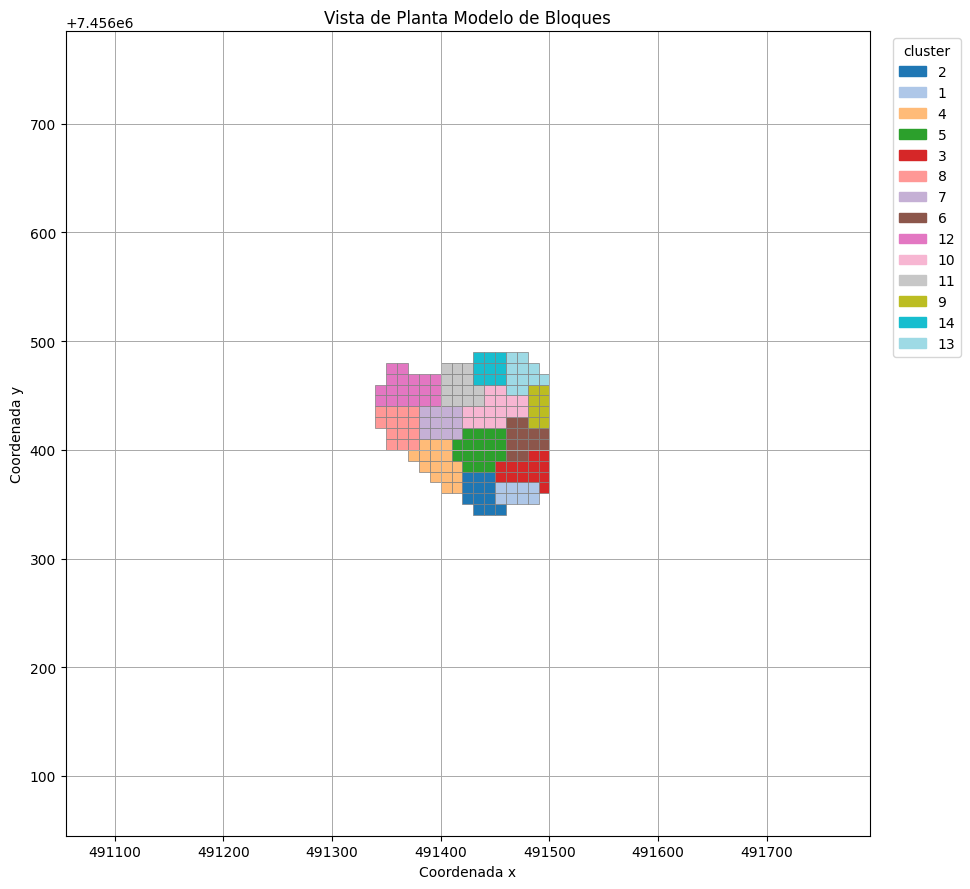

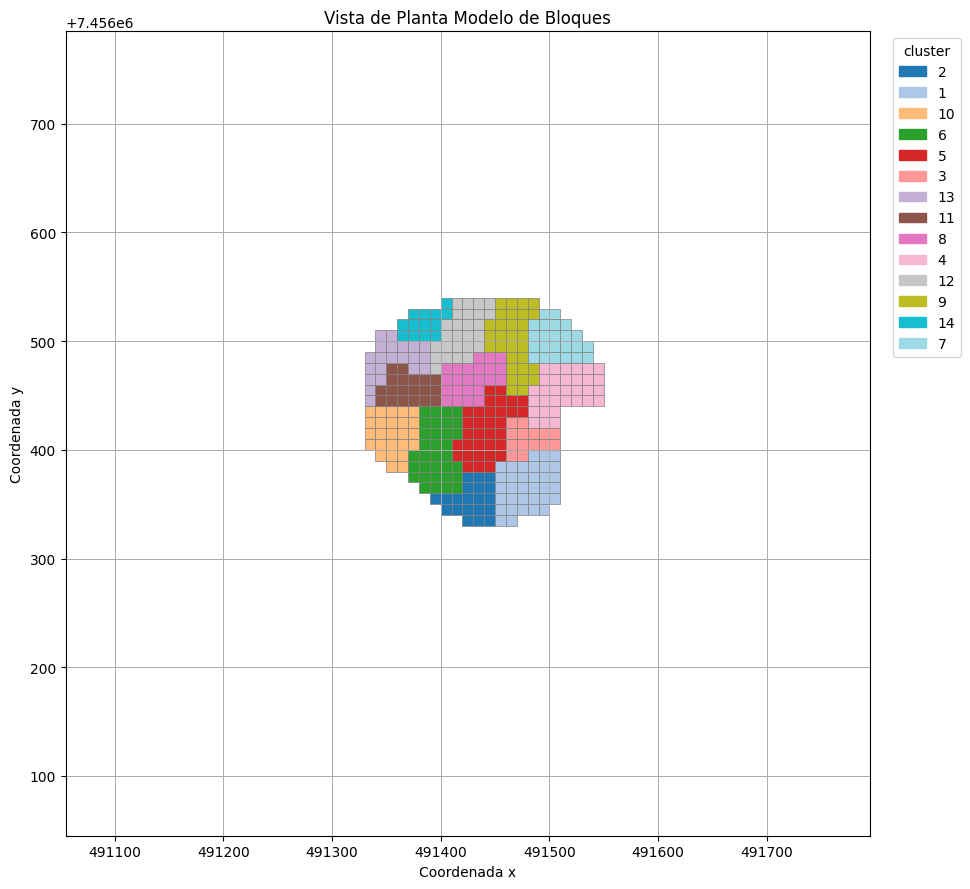

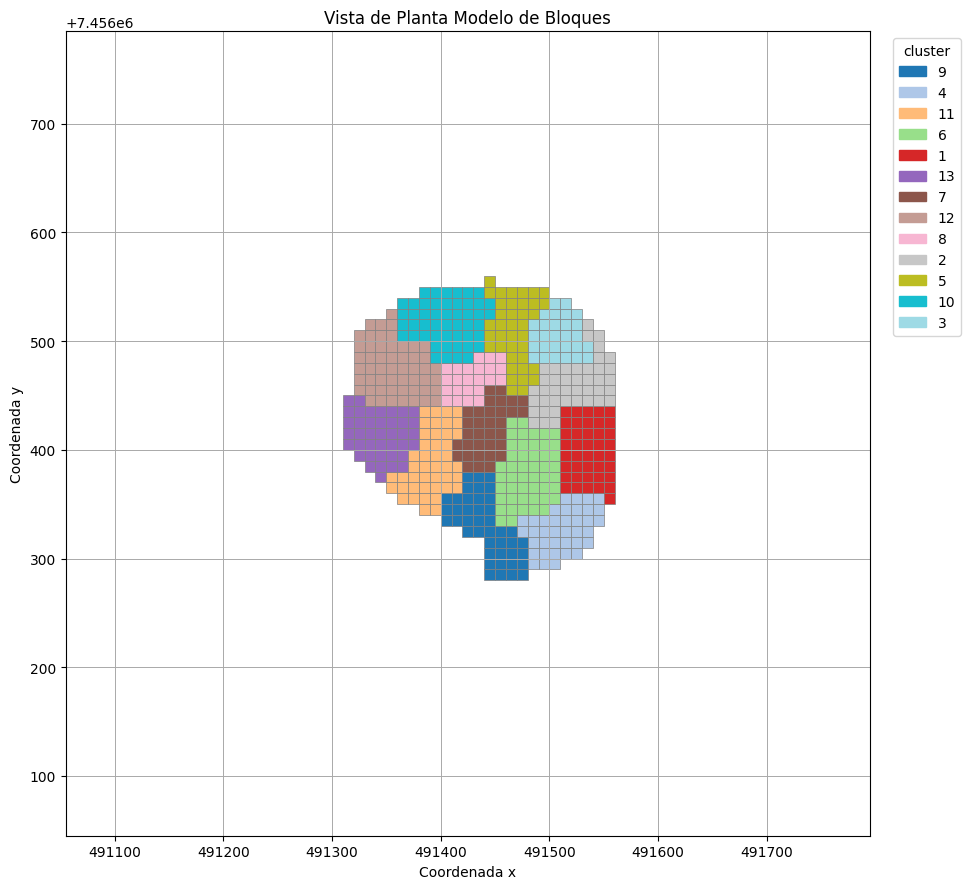

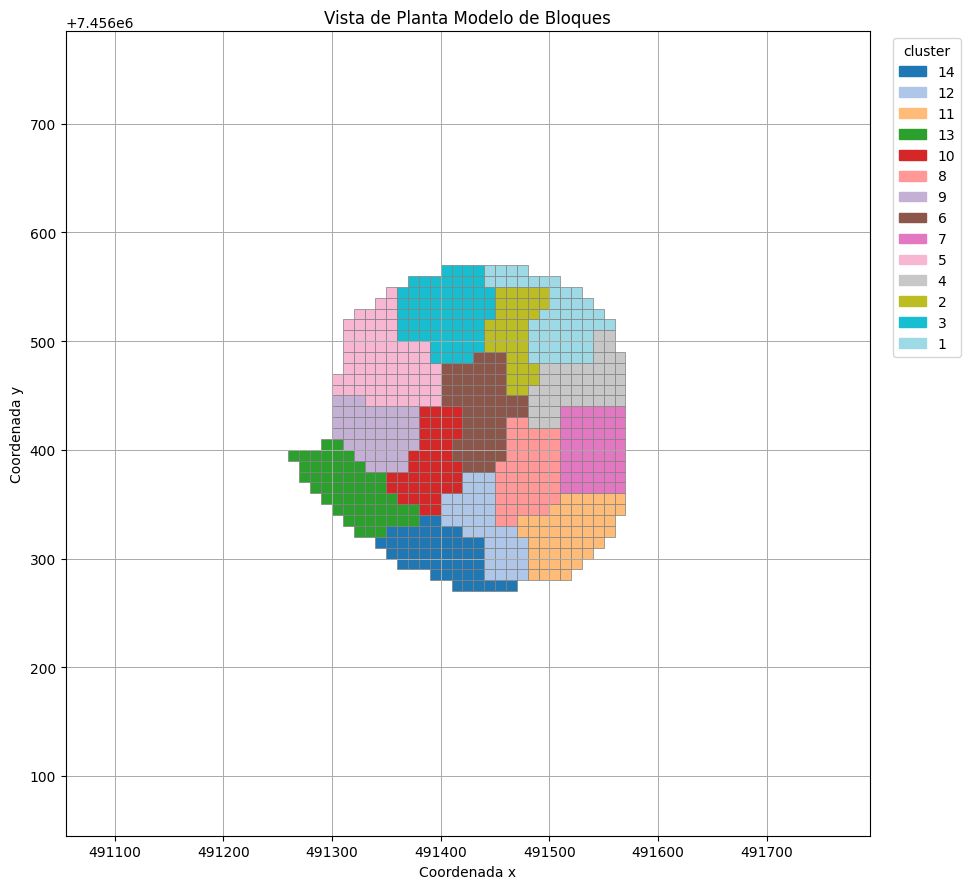

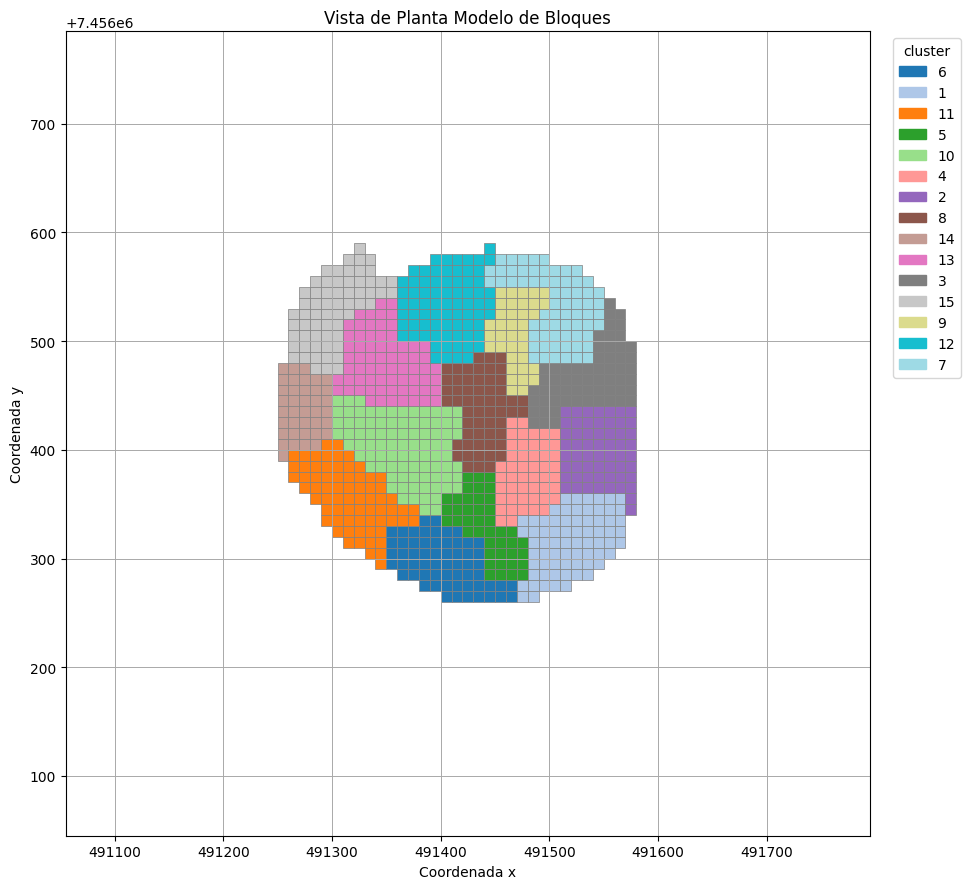

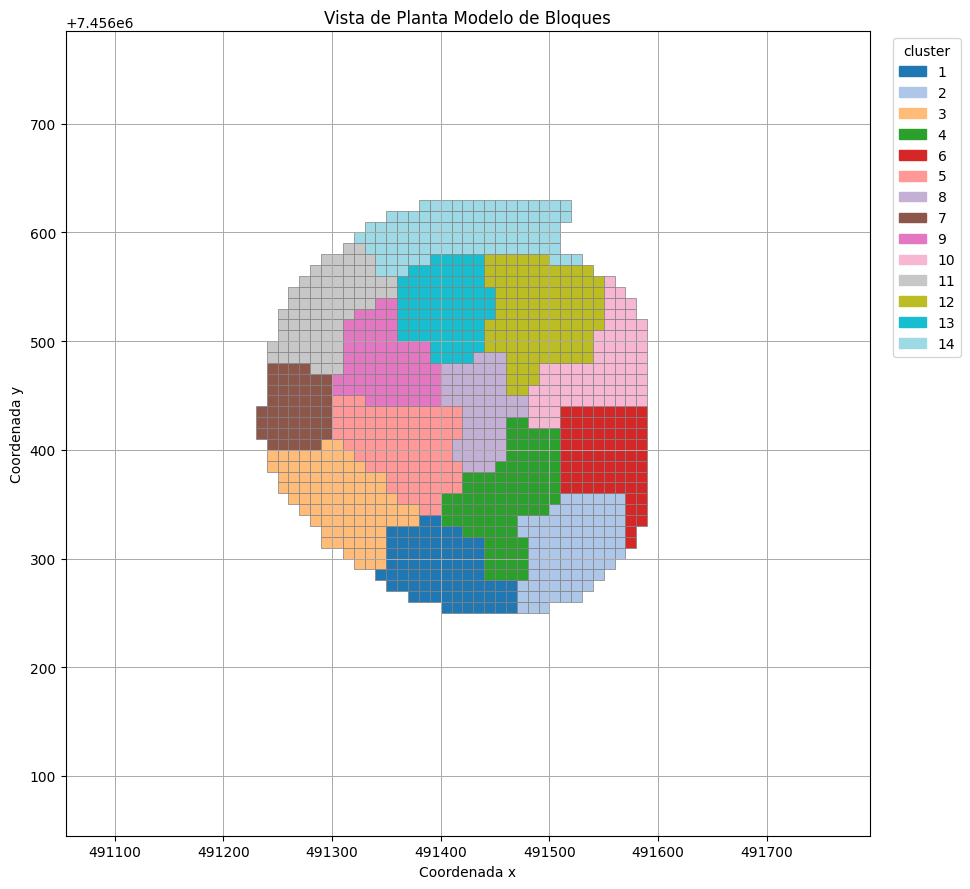

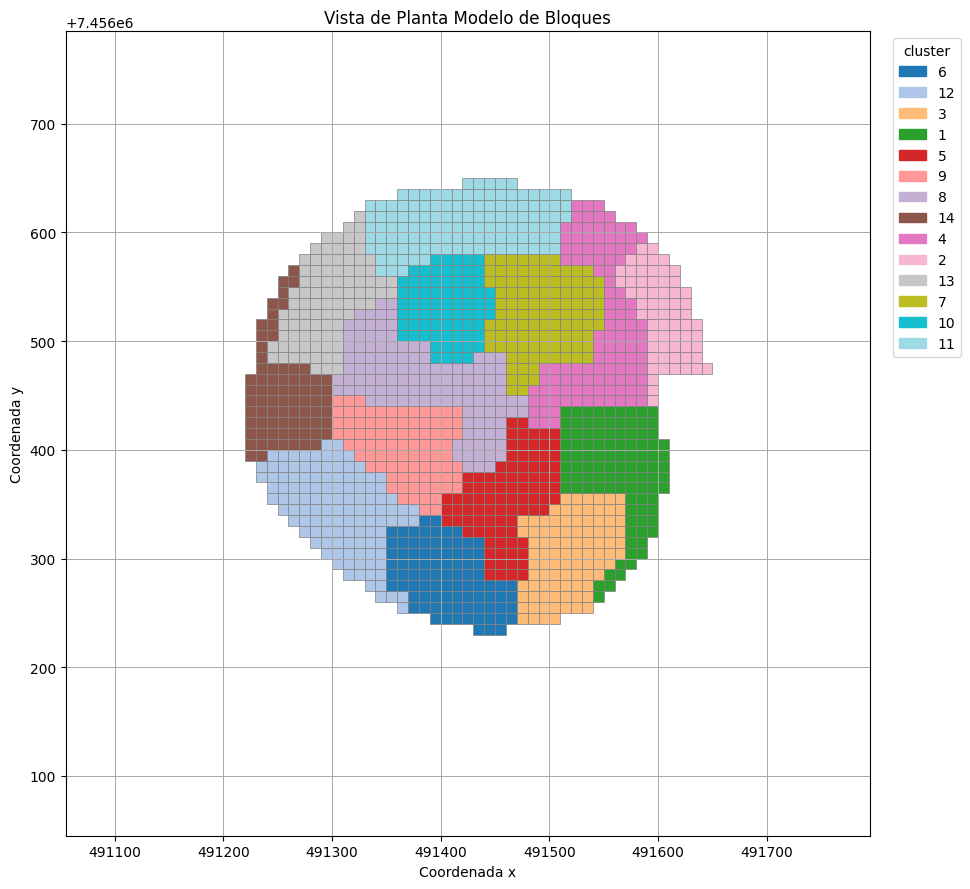

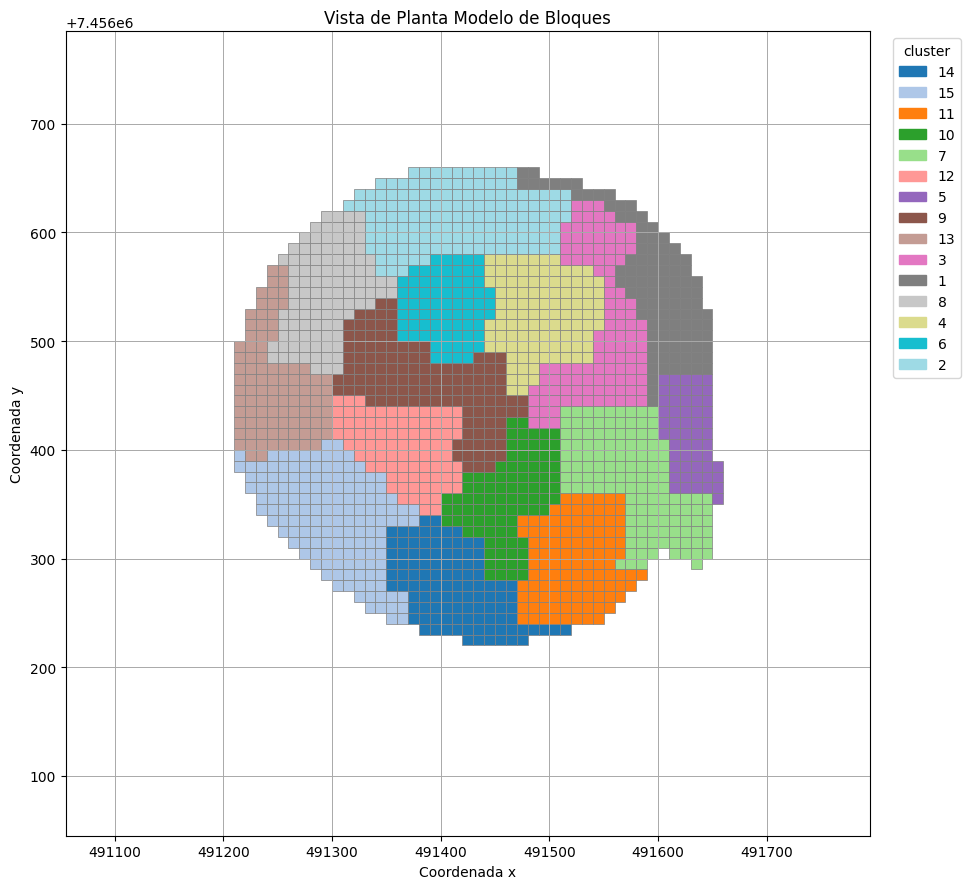

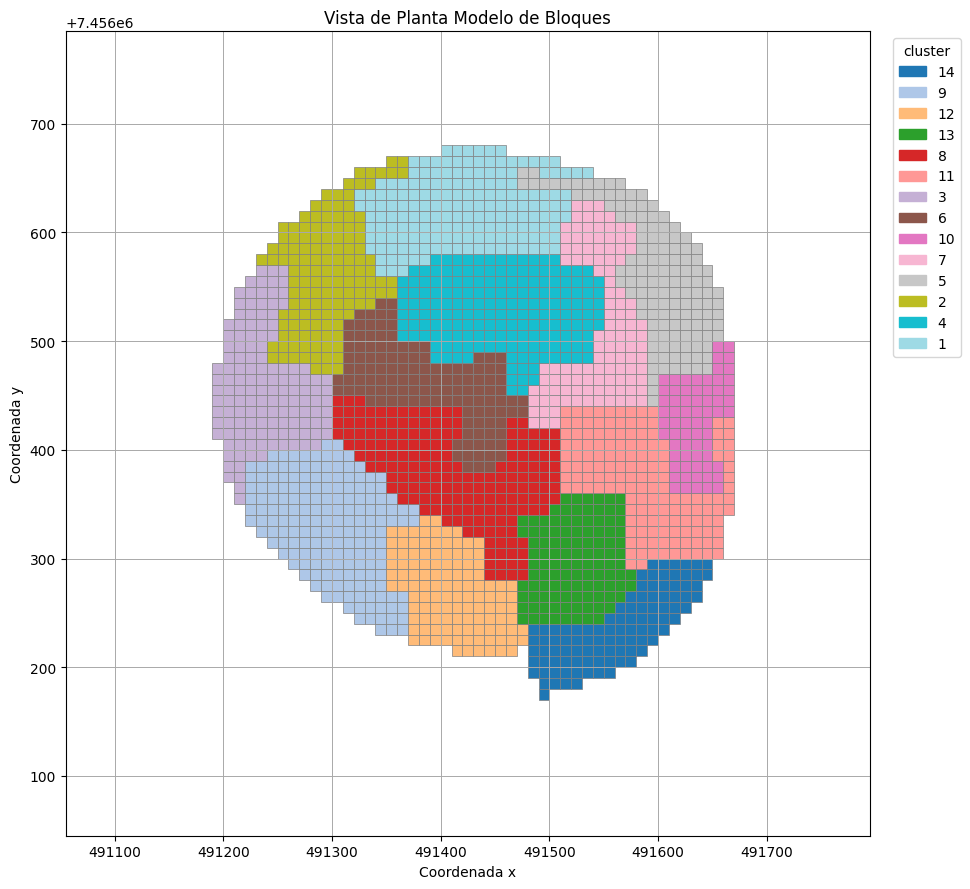

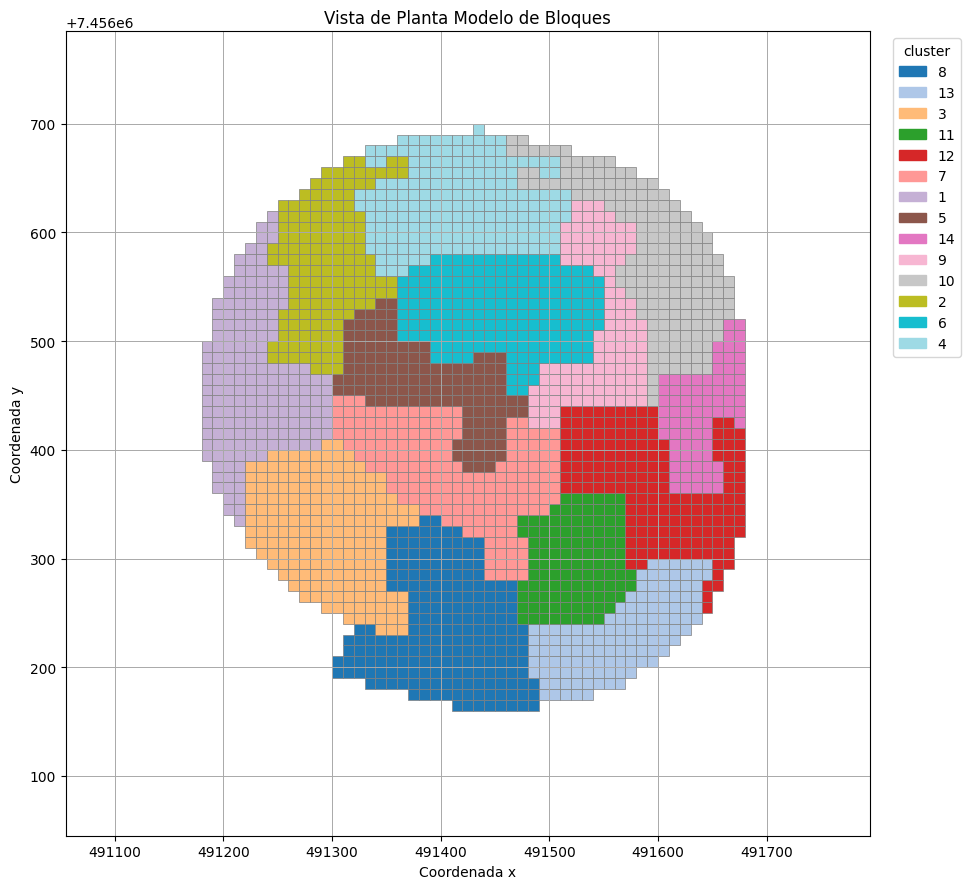

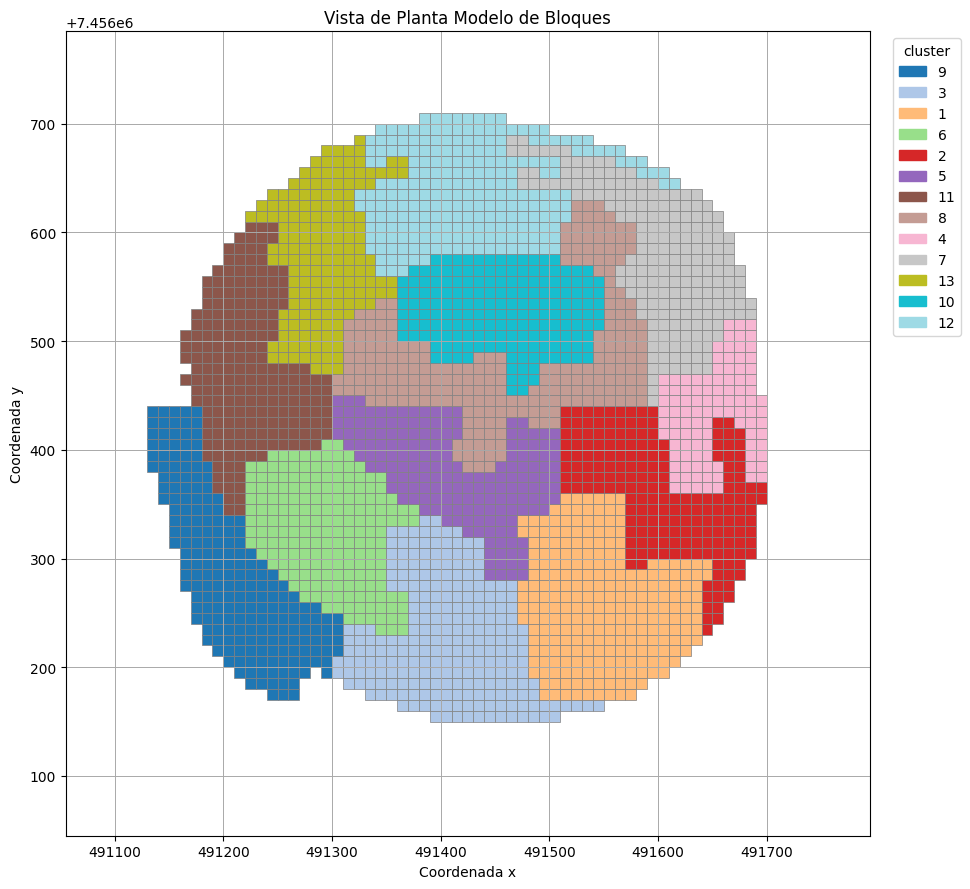

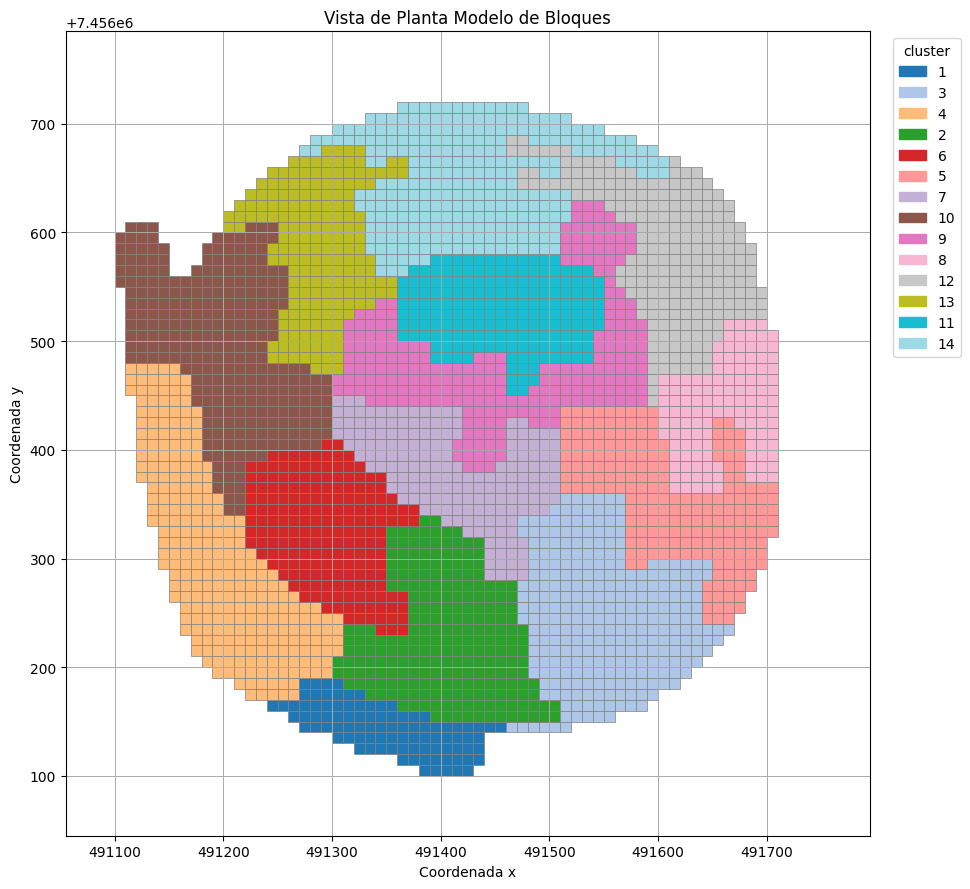

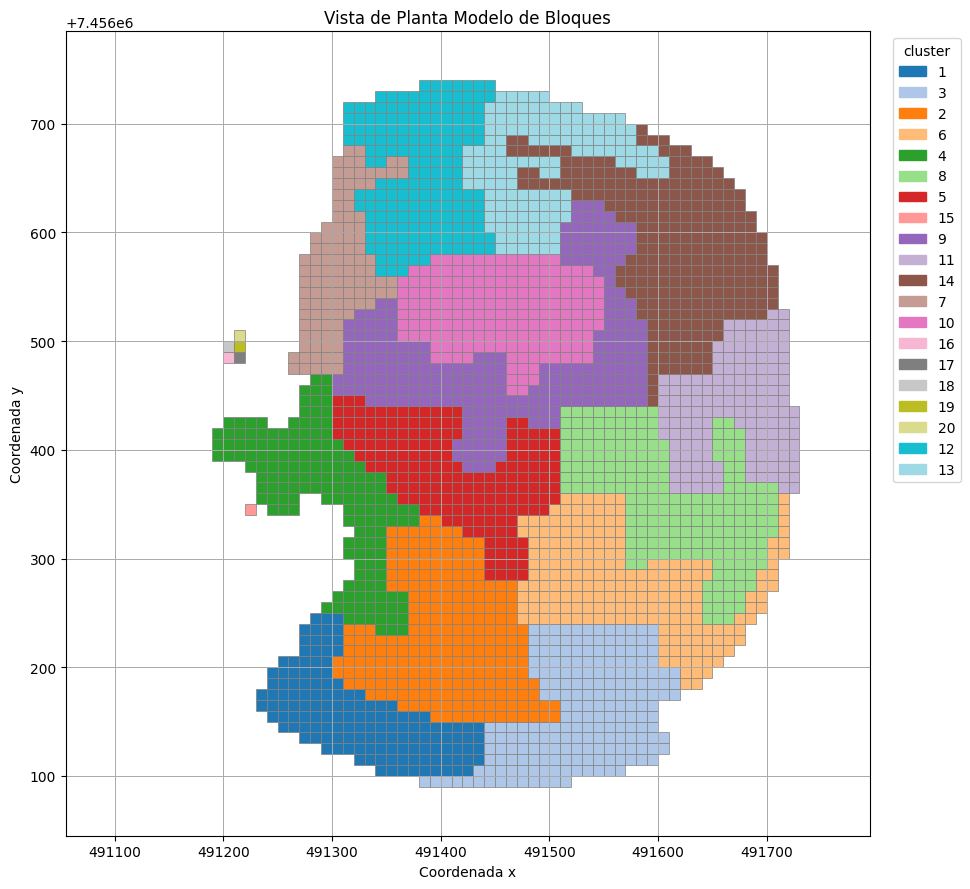

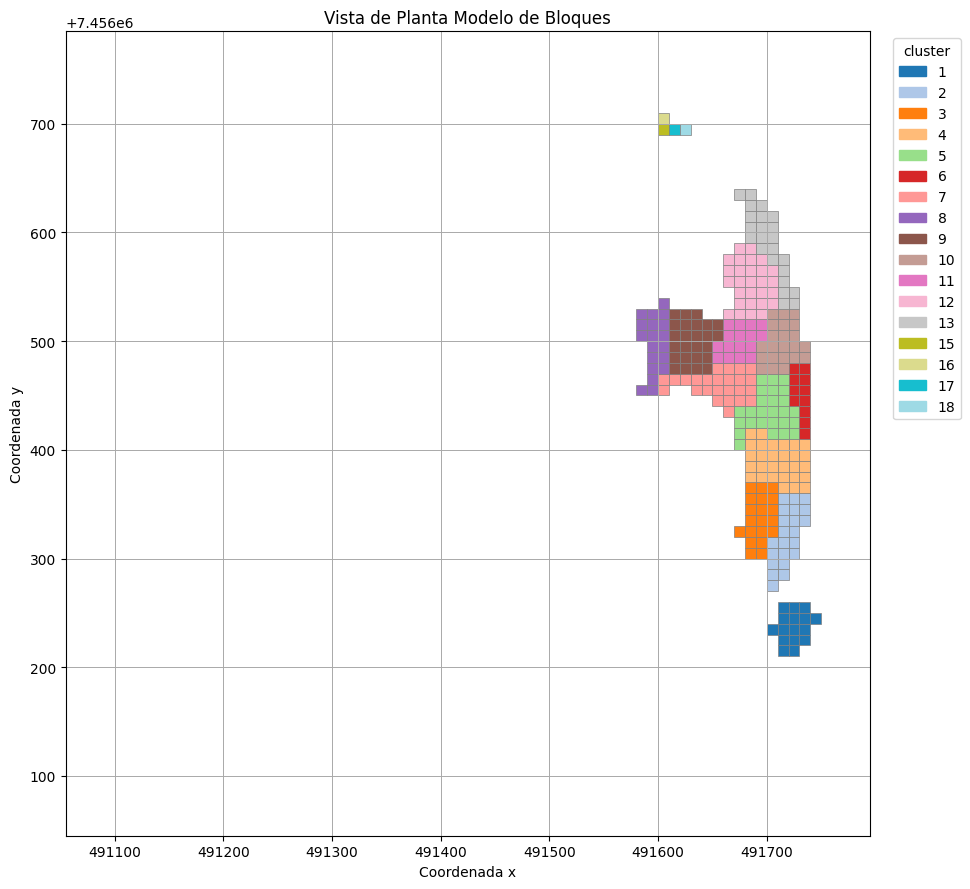

In [8]:
import aux_tools as aux
fase_data = mina_clusterizada
df = mina_clusterizada
x_min_global = fase_data['x'].min() - 5*10
x_max_global = fase_data['x'].max() + 5*10
y_min_global = fase_data['y'].min() - 5*10
y_max_global = fase_data['y'].max() + 5*10

for b in df['banco'].unique():
    df_ = df[(df['banco'] == b)]
    aux.plot_mine_blocks_adv(df_, color_by_col='cluster', xlim=(x_min_global, x_max_global),
                         ylim=(y_min_global, y_max_global), save=True, save_name=f'fase{1}banco{b}.png')


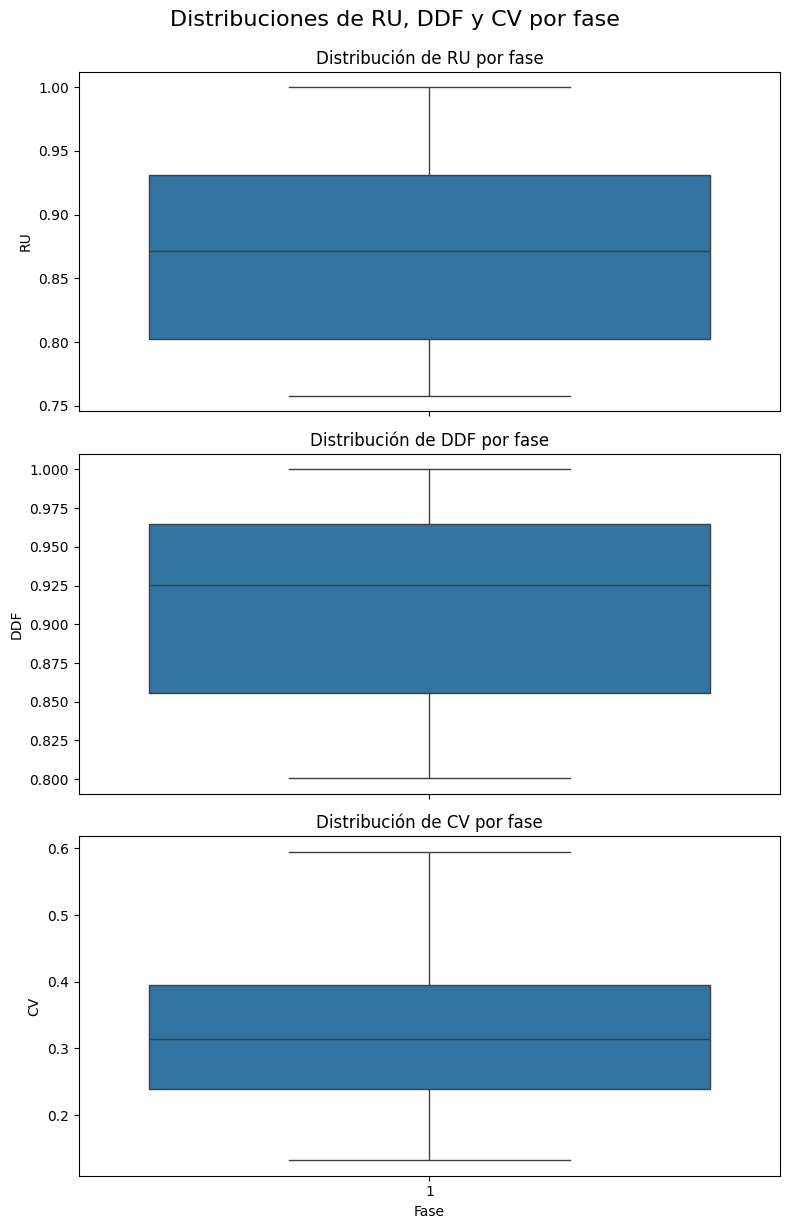

In [9]:
# Lista para guardar resultados
df = mina_clusterizada
metricas = []
# Suponemos que las fases son 1 a 4 (puedes adaptar según tu df)
for i in df['fase'].unique():
   for j in df[df['fase']==i]['banco'].unique():
        df_fase = df[(df['fase']==i)&(df['banco']==j)]
        # Calcular CV usando tu función
        cv = mt.Coefficient_Variation(df_fase)[0]
        ru = mt.Rock_Unity(df_fase)[0]
        ddf = mt.Destination_Dilution_Factor(df_fase)[0]
        # Agregar fila con placeholders para RU y DDF
        metricas.append({
            'fase': i,
            'banco':j,
            'RU': ru,       # Placeholder
            'CV': cv,
            'DDF': ddf       # Placeholder
        })

# Crear DataFrame final
metricas = pd.DataFrame(metricas)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

sns.boxplot(data=metricas, x='fase', y='RU', ax=axes[0])
axes[0].set_title('Distribución de RU por fase')
axes[0].set_ylabel('RU')

sns.boxplot(data=metricas, x='fase', y='DDF', ax=axes[1])
axes[1].set_title('Distribución de DDF por fase')
axes[1].set_ylabel('DDF')

sns.boxplot(data=metricas, x='fase', y='CV', ax=axes[2])
axes[2].set_title('Distribución de CV por fase')
axes[2].set_xlabel('Fase')
axes[2].set_ylabel('CV')    

plt.tight_layout()
plt.suptitle('Distribuciones de RU, DDF y CV por fase', fontsize=16, y=1.02)

plt.savefig("grafico.png", dpi=300)